In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import os
from nlp.lda_model.preprocessing_functions_lda import *
from nlp.lda_model.run_lda_analysis import main
import pyLDAvis
import pyLDAvis.gensim 

[nltk_data] Downloading package punkt to /home/floor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/floor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/floor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
os.chdir("../..")

## __Iteration 1__ 

### Preprocessed content

In [5]:
## Read preprocessed data 
preprocessed_df = pd.read_parquet('nlp/data/processed/preprocessed_df.parquet')

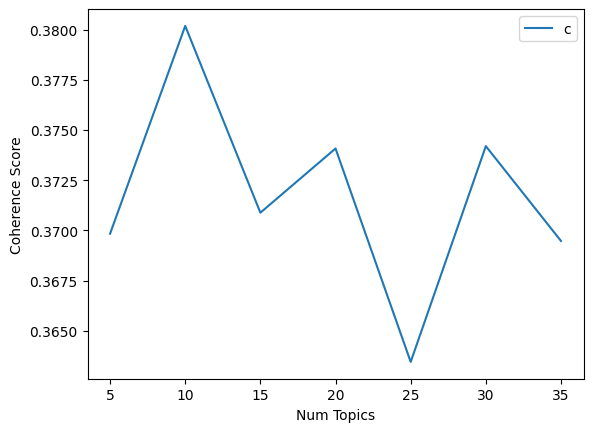

In [6]:
# After a while you will see the plot, choose the number of topics with the highest coherence in the prompt, and the model will finish with this number of topics

vis1 = main(
    app_name="it1",
    series=preprocessed_df.preprocessed_content,
    nr_of_topics=20,
    nr_of_words_per_topic=10,
    start=5,
    limit=40,
    step=5
)
pyLDAvis.display(vis1)


In [ ]:
topics_1 = pd.read_csv('nlp/results_lda/topic_word_weights_data/it1.csv')
topics_1[topics_1['topic'] == 0]

topic      word  weight
0      0     zacks   0.019
1      0      year   0.019
2      0   company   0.015
3      0   quarter   0.014
4      0     stock   0.013
5      0  earnings   0.013
6      0   revenue   0.010
7      0    growth   0.010
8      0     share   0.009
9      0    nasdaq   0.008

In [ ]:
coherence_score_1 = pd.read_csv('nlp/results_lda/topic_vs_coherence_data/it1.csv')
coherence_score_1

nr_topics  coherence_values  perplexity_values
0          5          0.369836          -7.766251
1         10          0.380186          -7.831775
2         15          0.370883          -7.921747
3         20          0.374081          -8.013044
4         25          0.363449          -8.106148
5         30          0.374198          -8.199612
6         35          0.369475          -8.280867

## __Iteration 2__ 

### Remove words with digit

In [ ]:
df_filtered_on_content = pd.read_parquet('nlp/data/processed/filtered_df.parquet')

In [10]:
## Perform same preprocessing steps but now with function that removes digits AND words words with digits (like L5)

# Convert to lowercase
df_filtered_on_content.loc[:, 'preprocessed_content'] = convert_to_lowercase(df_filtered_on_content['content'])

# Remove URLs
df_filtered_on_content.loc[:, 'preprocessed_content'] = remove_all_urls(df_filtered_on_content['preprocessed_content'])

# Remove all words that are note characters
df_filtered_on_content.loc[:, 'preprocessed_content'] = remove_non_words_characters(df_filtered_on_content['preprocessed_content'])

# Remove digits and words with digits
df_filtered_on_content.loc[:, 'preprocessed_content'] = remove_any_digits_and_words_with_digits(df_filtered_on_content['preprocessed_content'])

# Tokenize words
df_filtered_on_content.loc[:, 'preprocessed_content'] = tokenize_words(df_filtered_on_content['preprocessed_content'])

# Remove stopwords
df_filtered_on_content.loc[:, 'preprocessed_content'] = remove_stopwords(df_filtered_on_content['preprocessed_content'])

# Lemmatize words 
df_filtered_on_content.loc[:, 'preprocessed_content'] = lemmatize(df_filtered_on_content['preprocessed_content'])


In [11]:
preprocessed_df = df_filtered_on_content

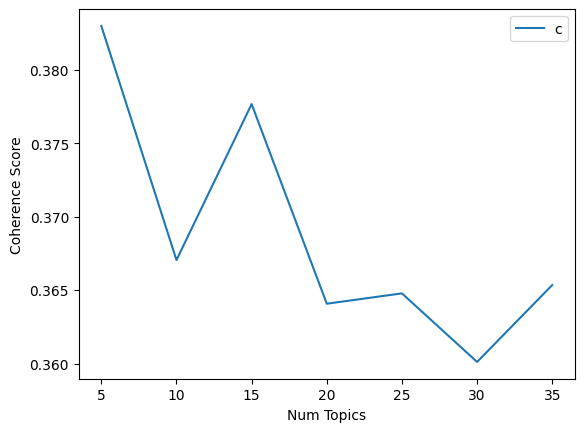

In [12]:
vis2 = main(
    app_name="it2",
    series=preprocessed_df.preprocessed_content,
    nr_of_topics=10,
    nr_of_words_per_topic=10,
    start=5,
    limit=40,
    step=5
)
pyLDAvis.display(vis2)


In [ ]:
topics_2 = pd.read_csv('nlp/results_lda/topic_word_weights_data/it2.csv')
topics_2[topics_2['topic'] == 0]

topic      word  weight
0      0      year   0.020
1      0   quarter   0.014
2      0   million   0.013
3      0     share   0.011
4      0   revenue   0.010
5      0     zacks   0.009
6      0     intel   0.009
7      0   company   0.009
8      0     stock   0.009
9      0  earnings   0.009

In [ ]:
coherence_score_2 = pd.read_csv('nlp/results_lda/topic_vs_coherence_data/it2.csv')
coherence_score_2

nr_topics  coherence_values  perplexity_values
0          5          0.382984          -7.764086
1         10          0.367044          -7.841793
2         15          0.377662          -7.923674
3         20          0.364071          -8.010978
4         25          0.364774          -8.097351
5         30          0.360108          -8.196322
6         35          0.365341          -8.284012

## __Iteration 3__ 

### Remove most used words

In [16]:
# Add column to remove 5% most used words
preprocessed_df.loc[:, 'most_word_removal'] = remove_top_n_percentage_words(preprocessed_df['preprocessed_content'], n = 5)

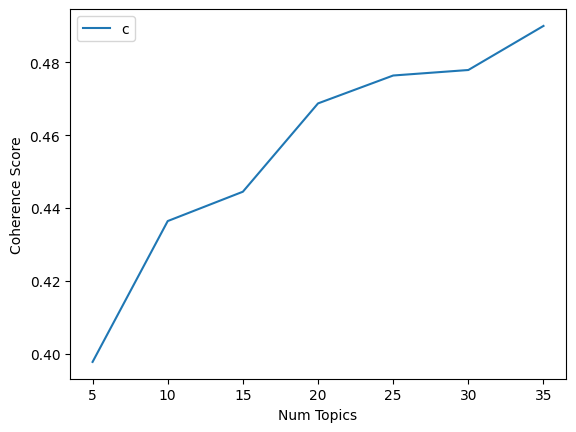

In [17]:
vis3 = main(
    app_name="it3",
    series=preprocessed_df.most_word_removal,
    nr_of_topics=15,
    nr_of_words_per_topic=10,
    start=5,
    limit=40,
    step=5
)
pyLDAvis.display(vis3)

In [ ]:
topics_3 = pd.read_csv('nlp/results_lda/topic_word_weights_data/it3.csv')
topics_3[topics_3['topic'] == 0]

topic       word  weight
0      0         ml   0.009
1      0       epyc   0.004
2      0        fmc   0.004
3      0     paycom   0.003
4      0  discussed   0.003
5      0     finest   0.003
6      0      owing   0.003
7      0         rx   0.003
8      0        hpc   0.003
9      0    covered   0.003

In [ ]:
coherence_score_3 = pd.read_csv('nlp/results_lda/topic_vs_coherence_data/it3.csv')
coherence_score_3

nr_topics  coherence_values  perplexity_values
0          5          0.397755          -9.450019
1         10          0.436428          -9.837589
2         15          0.444482         -10.177346
3         20          0.468728         -10.476225
4         25          0.476385         -10.780176
5         30          0.477895         -11.060738
6         35          0.489997         -11.314596

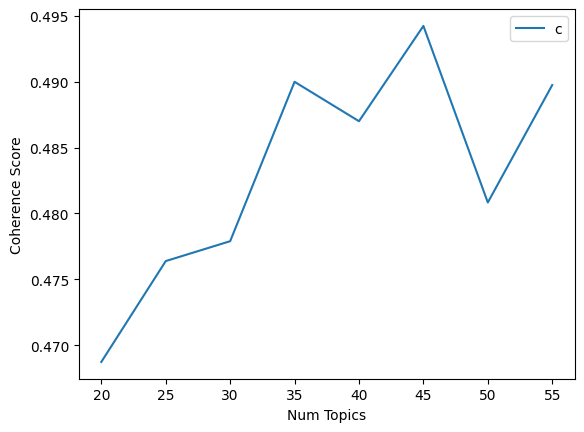

In [20]:
## See if a higher number of topics is better

vis3_2 = main(
    app_name="it3_2",
    series=preprocessed_df.most_word_removal,
    nr_of_topics=15,
    nr_of_words_per_topic=10,
    start=20,
    limit=60,
    step=5
)
pyLDAvis.display(vis3_2)

In [ ]:
coherence_score_3_2 = pd.read_csv('nlp/results_lda/topic_vs_coherence_data/it3_2.csv')
coherence_score_3_2

nr_topics  coherence_values  perplexity_values
0         20          0.468728         -10.476225
1         25          0.476385         -10.780176
2         30          0.477895         -11.060738
3         35          0.489997         -11.314596
4         40          0.487005         -11.585926
5         45          0.494241         -11.867107
6         50          0.480834         -12.078531
7         55          0.489752         -12.344962

## __Iteration 4__ 

### Remove least used words

In [22]:
# Add column to remove 5% least used words
preprocessed_df.loc[:, 'least_word_removal'] = remove_bottom_n_percentage_words(preprocessed_df['most_word_removal'], n=5)

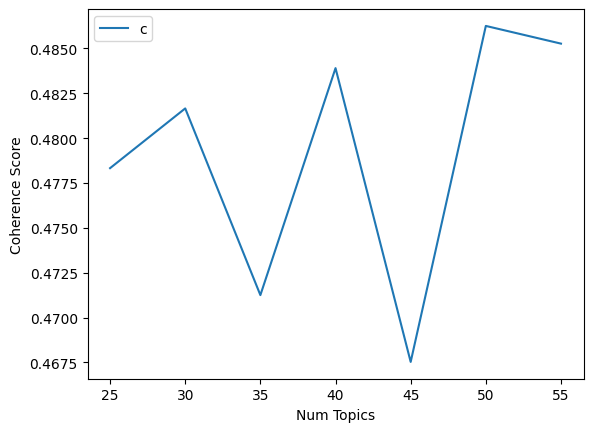

In [23]:
vis4 = main(
    app_name="it4",
    series=preprocessed_df.least_word_removal,
    nr_of_topics=45,
    nr_of_words_per_topic=10,
    start=25,
    limit=60,
    step=5
)
pyLDAvis.display(vis4)

In [ ]:
topics_4 = pd.read_csv('nlp/results_lda/topic_word_weights_data/it4.csv')
topics_4[topics_4['topic'] == 5]

topic          word  weight
50      5      accurate   0.008
51      5         steve   0.006
52      5   reitmeister   0.006
53      5  conclusively   0.005
54      5  confidential   0.005
55      5      cannabis   0.005
56      5            vp   0.005
57      5     triggered   0.004
58      5    prediction   0.004
59      5       shaping   0.004

In [ ]:
coherence_score_4 = pd.read_csv('nlp/results_lda/topic_vs_coherence_data/it4.csv')
coherence_score_4

nr_topics  coherence_values  perplexity_values
0         25          0.478330         -10.655705
1         30          0.481660         -10.924486
2         35          0.471252         -11.155780
3         40          0.483905         -11.405126
4         45          0.467527         -11.638372
5         50          0.486258         -11.865407
6         55          0.485271         -12.093313

## __Iteration 5__

### Remove single letter words

In [26]:
preprocessed_df.loc[:, 'remove_single_letter_word'] = remove_single_letter_words(preprocessed_df['least_word_removal'])

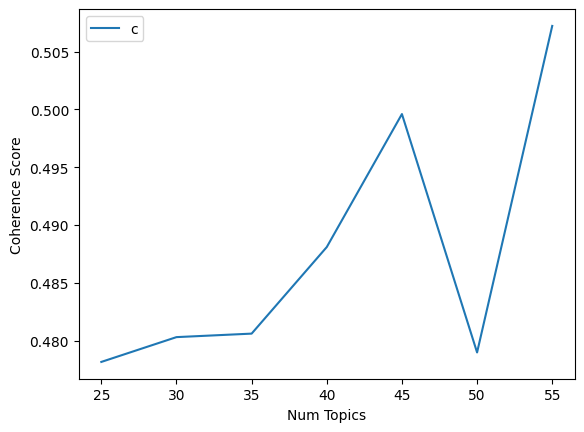

In [27]:
vis5 = main(
    app_name="it5",
    series=preprocessed_df.remove_single_letter_word,
    nr_of_topics=20,
    nr_of_words_per_topic=10,
    start=25,
    limit=60,
    step=5
)
pyLDAvis.display(vis5)

In [ ]:
topics_5 = pd.read_csv('nlp/results_lda/topic_word_weights_data/it5.csv')
topics_5[topics_5['topic'] == 5]

topic      word  weight
50      5    travel   0.005
51      5   expedia   0.004
52      5     arrow   0.004
53      5        zf   0.004
54      5      cree   0.003
55      5       peg   0.003
56      5  shanghai   0.003
57      5   pacific   0.003
58      5      msci   0.002
59      5    agency   0.002

In [ ]:
coherence_score_5 = pd.read_csv('nlp/results_lda/topic_vs_coherence_data/it5.csv')
coherence_score_5

nr_topics  coherence_values  perplexity_values
0         25          0.478153         -10.673173
1         30          0.480299         -10.920249
2         35          0.480602         -11.169500
3         40          0.488094         -11.422094
4         45          0.499602         -11.665236
5         50          0.478972         -11.863207
6         55          0.507228         -12.080535

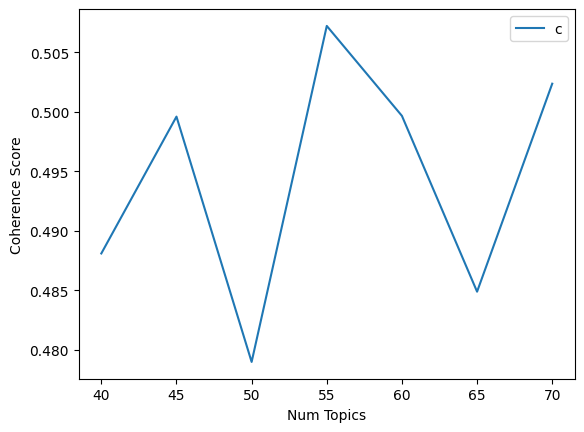

In [ ]:
## See if an higher number of topics is better 

vis5_2 = main(
    app_name="it5_2",
    series=preprocessed_df.remove_single_letter_word,
    nr_of_topics=20,
    nr_of_words_per_topic=10,
    start=40,
    limit=75,
    step=5
)
pyLDAvis.display(vis5_2)

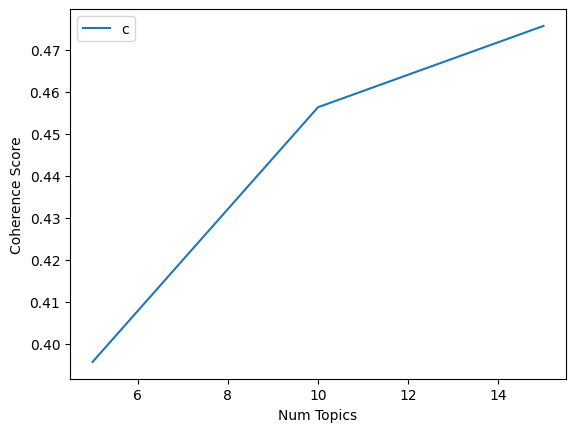

In [ ]:
## See if an lower number of topics is better 

vis5_3 = main(
    app_name="it5_3",
    series=preprocessed_df.remove_single_letter_word,
    nr_of_topics=5,
    nr_of_words_per_topic=10,
    start=5,
    limit=20,
    step=5
)
pyLDAvis.display(vis5_3)